##### $\textbf{Question 1}$ 

Suppose that a stock price at time $t$ obeys:

$$
\begin{align}
p_t & = d_t + \beta_t p_{t+1}, \qquad t = 0, 1, \dots, T,
\end{align}\tag{1}
$$

where $d_t$ is the dividend at time $t$ and $p_t$ is the price of stock at time $t$.

Let $T+1$ denote an integer date in which the company files for a bankruptcy, and let $p_{T+1}$ be the stock price at this date. 

Here, the integer $T$ is such that $T>20$ and the discount factor is described by:

$$
\begin{align}
\beta_t & =
\begin{cases}
\beta_1, \qquad t = 0, 1, \dots, 15, \\ 
\beta_2, \qquad t = 16, 17, 18, \\
\beta_3, \qquad t = 19, 20, \dots, T-1, \\
\beta_T, \qquad t = T.
\end{cases}
\end{align}    
$$

where $\beta_1, \beta_2, \beta_3, \beta_T \in (0,1)$.

<br>


$\textbf{a. }$ Please write a matrix equation

$$
A y = a + b
$$ 

that represents equations in (1) for $t=0,1,\dots,T$. Here, we note that:
* $A$ is a $(T+1)\times(T+1)$ matrix;
* $y$, $a$, $b$ are each  $(T+1)$ vectors.

Please map the sequences $\{p_t\}_{t=0}^T$, $\{d_t\}_{t=0}^T$, and the scalar $p_{T+1}$ into matrix $A$ and vectors $y$, $a$, and $b$. **Please do this part analytically and show formulas.**

$\textbf{b. }$ Please write a Python program that takes $T$, $p_{T+1}$, $\{d_t\}_{t=0}^T$ as inputs and forms $A$, $a$, and $b$.

$\textbf{c. }$ Please write a Python code to compute $A^{-1}$.

$\textbf{d. }$ Please use the formula $y = A^{-1}(a+b)$ to compute $\{p_t\}_{t=0}^T$ in Python. 

$\textbf{e. }$ Please write a Python program to compute $\{p_t\}_{t=0}^T$ when $T=25$, $p_{T+1}=1$, $d_t = (1+g)^t d_0$, $d_0=1$, $ g=0.025$, $\beta_1=0.9$, $\beta_2=0.95$, $\beta_3=0.99$, $\beta_T = 0.9$.

$\textbf{f. }$ Please repeat part $\textbf{e. }$ when $\beta_1=\beta_2=\beta_3=\beta_T=0.95$. What differences do you observe in the pattern of $\{p_t\}_{t=0}^T$?

<br>


##### Solution 

$$
A = 
\begin{bmatrix}
1 & -\beta_1 & 0 & \dots &  & \dots & 0\\
0 & 1 & -\beta_1 & 0 & \dots & \dots & 0\\
0 & 0 & 1 & -\beta_1 & 0 & \dots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & & \vdots\\
\vdots & \ddots & \ddots & \ddots & \ddots & & 0\\
\vdots &  &  & \ddots & 0 & 1 & -\beta_3\\
0 & 0 & \dots & \dots & \dots & 0 & 1
\end{bmatrix}, \quad
y = 
\begin{bmatrix}
p_0 \\
p_1 \\
p_2 \\
\vdots \\
\vdots \\
p_{T-1} \\
p_T
\end{bmatrix}, \quad
a = 
\begin{bmatrix}
d_0 \\
d_1 \\
d_2 \\
\vdots \\
\vdots \\
d_{T-1} \\
d_T
\end{bmatrix}, \quad
b = 
\begin{bmatrix}
0 \\
0 \\
0 \\
\vdots \\
\vdots \\
0 \\
\beta_T p_{T+1}
\end{bmatrix}.
$$





[[ 1.   -0.9   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    1.   -0.9   0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.    1.   -0.9   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.    0.    1.   -0.9   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.    0.    0.    1.   -0.9   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.   -0.9   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.   -0

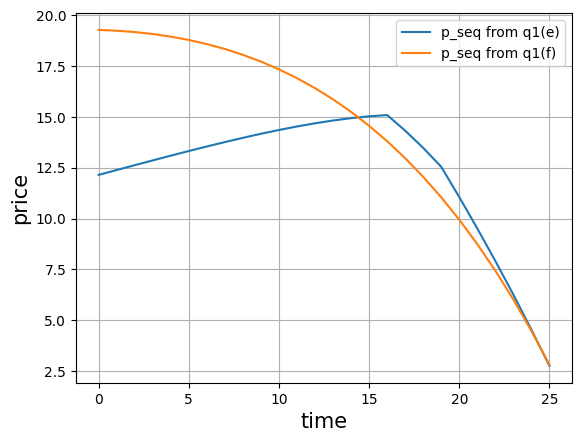

In [1]:


# -- read libraries 
import numpy as np
import matplotlib.pyplot as plt


# -- solution for Q1(b)
def fun_create_mat(T, T1_length, T2_length, T3_length, p_end, div_seq, beta1, beta2, beta3, betaT):
    
    temp1 = -beta1*np.concatenate([np.ones(T1_length),np.zeros(T2_length),np.zeros(T3_length)]) 
    temp2 = -beta2*np.concatenate([np.zeros(T1_length),np.ones(T2_length),np.zeros(T3_length)]) 
    temp3 = -beta3*np.concatenate([np.zeros(T1_length),np.zeros(T2_length),np.ones(T3_length)]) 
    
    A = np.eye(T+1) + np.diag(temp1,k=1) + np.diag(temp2,k=1) + np.diag(temp3,k=1)
    a = div_seq
    b = np.zeros(T+1)
    b[-1] = betaT * p_end
    return A, a, b

# -- solution for Q1(c)
def fun_inverse_mat(A):
    inv_A = np.linalg.inv(A)
    return inv_A

# -- solution for Q1(d)
def fun_create_pseq(inv_A, a, b):
    n = inv_A @ ( a + b )
    return n

# -- define parameters
T     = 25 
T1_l  = 16
T2_l  = 3
T3_l  = 6
TT_l  = 1
p_end = 1
beta1 = 0.9
beta2 = 0.95
beta3 = 0.99
betaT = 0.9
g     = 0.025

d_seq = np.zeros(T+1)
d_seq[0] = 1
for i in range(1,T+1):
    d_seq[i] = ((1+g)**i)*d_seq[0]

# -- solution for Q1(e)
A, a, b = fun_create_mat(T, T1_l, T2_l, T3_l, p_end, d_seq, beta1, beta2, beta3, betaT)
inv_A   = fun_inverse_mat(A)
p_seq   = fun_create_pseq(inv_A, a, b)
print(A)
print(d_seq)
print(p_seq)

# -- solution for Q1(f)
A1, a1, b1 = fun_create_mat(T, T1_l, T2_l, T3_l, p_end, d_seq, beta2, beta2, beta2, beta2)
inv_A1     = fun_inverse_mat(A1)
p_seq1     = fun_create_pseq(inv_A1, a1, b1)
print(p_seq1)

# -- plot
fig, ax = plt.subplots()
ax.plot(range(T+1),p_seq, label = 'p_seq from q1(e)')
ax.plot(range(T+1),p_seq1, label = 'p_seq from q1(f)')
ax.grid()
ax.legend()
ax.set_xlabel('time',fontsize=15)
ax.set_ylabel('price',fontsize=15)
plt.show() 

##### $\textbf{Question 2}$ 

Now assume that a stock price at time $t$ obeys:

$$
\begin{align}
p_t & = d_t + \beta p_{t+1}, \qquad t = 0, 1, \dots
\end{align}\tag{2}
$$



where $\{p_t\}$ and $\{d_t\}$ are again price and dividend sequences.

(Here $\ldots$ means that time goes on forever.)

The dividend process $\{d_t\}_{t=0}^\infty$ is described by: 

$$
d_t = G x_t, \tag{3}
$$

for some selector vector $G$ of length $(1\times n)$. Now, the state vector $x_t$ follows:

$$
x_{t+1} = \underbrace{A}_{n\times n} \cdot \underbrace{x_t}_{n\times 1}.\tag{4}
$$


<br>


$\textbf{a. }$ Suppose the sequence of $\{d_t\}$ satisfies $d_{t+1} = \phi_0 + \phi_1 d_t + \phi_2 d_{t-1} + z_t $, where $z_{t} = \delta_0 + \delta_1 t$ and $d_0, d_{-1}$ are given. Please map this process into equations (3)-(4) by specifying $A$, $x_t$, and $G$ explicitly. **Please do this analytically and show formulas.**

$\textbf{b. }$ Next, please write a Python program to simulate $\{d_t\}_{t=0}^{20}$ when $\phi_0 = 1.1$, $\phi_1 = 0.8$, $\phi_2 = -0.8$, $\delta_0=0.01$, $\delta_1=0.2$, $d_0 = d_{-1} = 1$. 

$\textbf{c. }$ Please verify that a solution of the infinite set of equations in (2) is $p_t = H x_t + c\beta^{-t}$, where $H = G(I - \beta A)^{-1}$ and $c$ is a scalar. **Please do this analytically and show formulas.**

<br>

##### Solution for Q2 -- a 

$$
A = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
\delta_0 + \phi_0 & \phi_1 & \phi_2 & \delta_1 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 1
\end{bmatrix}, \quad
x_t = 
\begin{bmatrix}
1 \\
d_t \\
d_{t-1} \\
t
\end{bmatrix}, \quad
G = 
\begin{bmatrix}
0 & 1 & 0 & 0
\end{bmatrix}.
$$


 

[1.         1.11       1.398      1.7404     1.98392    2.104816
 2.2067168  2.39152064 2.65784307 2.92305795 3.1221719  3.26929116
 3.42769541 3.6367234  3.87722239 4.10239919 4.29014144 4.4601938
 4.64604189 4.85867847 5.08010927]


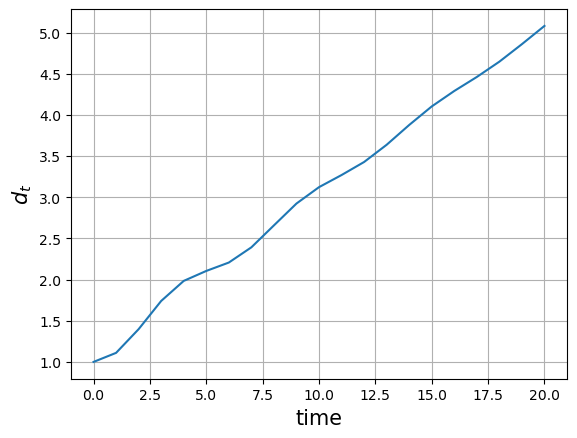

In [8]:
# -- solution for Q2(b)

T      = 21
phi0   = 1.1
phi1   = 0.8
phi2   = -0.8
delta0 = 0.01
delta1 = 0.2

dt    = np.zeros(T)
dt[0] = 1
dt[1] = phi0 + phi1 + phi2 + delta0

for i in range(2,T):
    # print(i)
    zt    = delta0 + delta1*(i-1)
    dt[i] = phi0 + phi1*dt[i-1] + phi2*dt[i-2] + zt
    
print(dt)    
# -- plot
fig1, ax1 = plt.subplots()
ax1.plot(range(T),dt)
ax1.grid()
ax1.set_xlabel('time',fontsize=15)
ax1.set_ylabel('$d_t$',fontsize=15)
plt.show()
